In [1]:
# Main imports
import pandas as pd
import numpy as np

# Define filepath
path = 'airbnb_data/'

# Create dataframe
data = pd.read_csv(f"{path}listings_summary.csv")

In [2]:
# Display first 5 observations to ensure proper creation of DataFrame
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [3]:
# View column names
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Gather the right data

The model will only be exposed to certain data. For this reason, it is on necessary to train the model on certain types of
data from what is available. This CSV contains all of that data, so I will extract only the needed columns.

In [4]:
# Define the needed columns
columns = [
    'minimum_nights', 'bedrooms', 'bathrooms', 'accommodates', 
    'bed_type', 'security_deposit', 'room_type', 'zipcode', 
    'amenities', 'price'
]

# Select the subset from data
data_2 = data[columns]

In [5]:
# Check that the DataFrame has been altered in the expected way
data_2.head()

,minimum_nights,bedrooms,bathrooms,accommodates,bed_type,security_deposit,room_type,zipcode,amenities,price
0,4,1.0,1.0,3,Real Bed,$200.00,Entire home/apt,10119,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00
1,2,1.0,1.0,2,Real Bed,$0.00,Private room,10437,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00
2,62,1.0,1.0,4,Real Bed,$200.00,Entire home/apt,10405,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00
3,5,1.0,1.0,2,Pull-out Sofa,$250.00,Private room,10777,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00
4,2,1.0,1.0,2,Real Bed,$0.00,Private room,10437,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00


In [6]:
# Check dtypes on each column
for column in data_2.columns:
    print(
        f"{column}:\t{data_2[column].dtype}"
    )

minimum_nights:	int64
bedrooms:	float64
bathrooms:	float64
accommodates:	int64
bed_type:	object
security_deposit:	object
room_type:	object
zipcode:	object
amenities:	object
price:	object


# Get the data in the right format

Some of the data that should be in a numeric data type is currently a string. The amenities looks like it was poorly converted
from JSON format. The data will need to be cleaned before we can use it to make any predictions.

In [7]:
# Create a function to clean the security deposit column
def clean_security_deposit(value):
    """
    Function accepts single value inputs. If the value is a string, 
    it will strip the '$' and ',' out of the string before converting
    the string to an integer.
    """
    try:
        if type(value) != str:
            return value
        else:
            new_value = value.replace("$", "")
            new_value_2 = new_value.replace(",","")
            return int(float(new_value_2))
    except:
        new_value = str(value).replace("$", "")
        new_value_2 = new_value.replace(",", "")
        return int(float(new_value_2))
    


In [8]:
# Create a function to clean the zipcode column
def clean_zipcode(value):
    """
    Function accepts single value inputs. If the regex pattern is matched, 
    return the match. 
    """
    if type(value) != str:
        return value
    else:
        pattern = '\d+'
        result = re.findall(pattern, value)
        return int(result[0])


In [9]:
# Create a function to clean the price column
def clean_price(value):
    """
    Function accepts single value inputs. If the is a string,
    it will strip the '$' and ',' out of the string before converting
    the string to a float.
    """
    try:
        if type(value) != str:
            return value
        else:
            new_value = value.replace("$", "")
            new_value_2 = new_value.replace(",", "")
            return float(new_value_2)
    except:
        new_value = str(value).replace("$", "")
        new_value_2 = new_value.replace(",", "")
        return float(new_value_2)
    

In [10]:
# Create function to pull needed amenities out into a list
def fix_amenities(value):
    """
    Function accepts single value inputs. If the regex pattern is matched, 
    it will return a list of all values that match and are represented as
    an amenity that we want.
    """
    pattern = '\w+\s?\w+\s?\w+\s?\w+|\w+\s?\w+\s?\w+|\w+\s?\w+|\w+'
    result = re.findall(pattern, value.lower())
    return result


In [11]:
# Import re for regex matching
import re


# Apply functions to DataFrame columns
data_3 = data_2.copy()
data_3['security_deposit'] = data_2['security_deposit'].apply(clean_security_deposit)
data_3['zipcode'] = data_2['zipcode'].apply(clean_zipcode)
data_3['price'] = data_2['price'].apply(clean_price)

# Fix amenities to work with function
data_3['amenities'] = data_2['amenities'].apply(fix_amenities)


In [12]:
# OneHot encode amenities
data_3 = data_3.drop('amenities', 1).join(data_3['amenities'].str.join('|').str.get_dummies())
# Remove nans, unable to impute accurately
data_final = data_3.dropna()

In [13]:
# Import sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder, OneHotEncoder


In [14]:
# Train / Test split
# Split into feature matrix and target vector


target = 'price'

X = data_final.drop(columns=target)
y = data_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [15]:
X_train['laundry'] = np.zeros(len(X_train))
X_train['security'] = np.zeros(len(X_train))
X_train['patio'] = np.zeros(len(X_train))
X_train['spa'] = np.zeros(len(X_train))
X_train['cleaning'] = np.zeros(len(X_train))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [16]:
X_train['laundry'] = X_train['laundry'].astype(int)
X_train['security'] = X_train['security'].astype(int)
X_train['patio'] = X_train['patio'].astype(int)
X_train['spa'] = X_train['spa'].astype(int)
X_train['cleaning'] = X_train['cleaning'].astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [17]:
X_test['laundry'] = np.zeros(len(X_test))
X_test['security'] = np.zeros(len(X_test))
X_test['patio'] = np.zeros(len(X_test))
X_test['spa'] = np.zeros(len(X_test))
X_test['cleaning'] = np.zeros(len(X_test))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [18]:
X_test['laundry'] = X_test['laundry'].astype(int)
X_test['security'] = X_test['security'].astype(int)
X_test['patio'] = X_test['patio'].astype(int)
X_test['spa'] = X_test['spa'].astype(int)
X_test['cleaning'] = X_test['cleaning'].astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [19]:
# Create Pipeline
pipeline = Pipeline(
    [('encoder', OrdinalEncoder()),
     ('model', LinearRegression())]
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(cols=['bed_type', 'room_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'bed_type',
                                          'data_type': dtype('O'),
                                          'mapping': Real Bed         1
Pull-out Sofa    2
Futon            3
Couch            4
Airbed           5
NaN             -2
dtype: int64},
                                         {'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Private room       1
Entire home/apt    2
Shared room        3
NaN               -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs

In [20]:
y_pred = pipeline.predict(X_train)

In [21]:
mean_squared_error(y_train, y_pred)

61222.26833844842

# Not great, but it's something

The results aren't amazing, actually fairly far from it. But at least this is giving us _something_

In [22]:
# Lets create a new set of data subset from only the highest review scores
new_data = data[data['review_scores_value']>=9]

In [23]:
# Pull out only the columns we care about
subset_data = new_data[columns]

In [24]:
# Impute 0 for security deposit if NaN
df = subset_data.copy()
df['security_deposit'] = df['security_deposit'].fillna(0)

In [25]:
# Drop other NaN values, they can't be imputed accurately
df = df.dropna()

In [26]:
# Clean the data
df['security_deposit'] = df['security_deposit'].apply(clean_security_deposit)
df['price'] = df['price'].apply(clean_price)
df['zipcode'] = df['zipcode'].apply(clean_zipcode)
df['amenities'] = df['amenities'].apply(fix_amenities)

In [27]:
df

,minimum_nights,bedrooms,bathrooms,accommodates,bed_type,security_deposit,room_type,zipcode,amenities,price
0,4,1.0,1.0,3,Real Bed,200,Entire home/apt,10119,"[tv, cable tv, wifi, kitchen, gym, heating, fa...",60.0
1,2,1.0,1.0,2,Real Bed,0,Private room,10437,"[wifi, kitchen, elevator, heating, washer, ess...",17.0
2,62,1.0,1.0,4,Real Bed,200,Entire home/apt,10405,"[internet, wifi, kitchen, buzzer, wireless int...",90.0
3,5,1.0,1.0,2,Pull-out Sofa,250,Private room,10777,"[internet, wifi, pets allowed, pets live on th...",26.0
4,2,1.0,1.0,2,Real Bed,0,Private room,10437,"[wifi, heating, family, kid friendly, essentia...",42.0
...,...,...,...,...,...,...,...,...,...,...
22346,1,1.0,1.0,1,Real Bed,0,Shared room,10115,"[wifi, heating, washer, first aid kit, safety ...",18.0
22352,1,1.0,1.0,4,Real Bed,600,Private room,13359,"[wifi, air conditioning, kitchen, smoking allo...",40.0
22367,1,1.0,1.0,2,Real Bed,0,Private room,10247,"[wifi, kitchen, breakfast, heating, washer, fi...",50.0
22398,2,2.0,1.0,4,Real Bed,0,Entire home/apt,10557,"[tv, wifi, air conditioning, kitchen, free par...",45.0


In [28]:
# OneHot amenities
df = df.join(df['amenities'].str.join('|').str.get_dummies())

In [29]:
# Drop amenities column
df = df.drop('amenities', 1)

In [111]:
# Re-sort amenities by occurance
amenity_count = dict()

for column in df:
    if column in columns:
        pass
    else:
        amenity_count[column] = df[column].value_counts().to_dict()
        
# Set to dataframe to sort
df_amenities = pd.DataFrame(amenity_count)

# Create list of popular index
amenities = df_amenities.iloc[1].sort_values(ascending=False)[:52].index.to_list()

# Remove nonsense indicies
amenities.remove('en')
amenities.remove('in')
amenities.remove('translation missing')
amenities.remove('hosting_amenity_50')
amenities.remove('hosting_amenity_49')


In [112]:
amenities

['wifi',
 'heating',
 'kitchen',
 'essentials',
 'washer',
 'hair dryer',
 'laptop friendly workspace',
 'hangers',
 'iron',
 'hot water',
 'shampoo',
 'tv',
 'family',
 'kid friendly',
 'internet',
 'host greets you',
 'smoke detector',
 'buzzer',
 'wireless intercom',
 'free street parking',
 'refrigerator',
 'dishes and silverware',
 'bed linens',
 'cooking basics',
 'stove',
 'lock on bedroom door',
 'oven',
 'elevator',
 'coffee maker',
 'smoking allowed',
 'first aid kit',
 'cable tv',
 'dishwasher',
 'long term stays allowed',
 'luggage dropoff allowed',
 'dryer',
 'fire extinguisher',
 'pets allowed',
 'extra pillows and blankets',
 'patio or balcony',
 'microwave',
 'private entrance',
 'paid parking off premises',
 'safety card',
 'free parking on premises',
 'private living room',
 'bathtub']

In [115]:
# Feed new data through the pipeline

# Split into feature matrix / target vector
new_columns = [
    'minimum_nights', 'bedrooms', 'bathrooms', 'accommodates', 
    'bed_type', 'security_deposit', 'room_type', 'zipcode', 
    'price'
]

X = df[new_columns + amenities].drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [185]:
# Fit ridge regressor as baseline model
from sklearn.linear_model import Ridge
model = Pipeline(
    [('encoder', OrdinalEncoder()), 
     ('reg', Ridge(alpha=10, solver='auto', tol=0.05))]
)


In [186]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(cols=['bed_type', 'room_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'bed_type',
                                          'data_type': dtype('O'),
                                          'mapping': Real Bed         1
Pull-out Sofa    2
Futon            3
Couch            4
Airbed           5
NaN             -2
dtype: int64},
                                         {'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Private room       1
Entire home/apt    2
Shared room        3
NaN               -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('reg',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=

In [187]:
model.score(X_train, y_train) # r^2 is 8%

0.08110959807915163

In [188]:
y_pred = model.predict(X_test)

In [189]:
y_pred[:5]

array([86.61193121, 47.79530451, 16.47172705, 80.0104625 , 94.52625868])

In [190]:
y_test[:5]

11300    60.0
14162    40.0
9454     25.0
16880    27.0
1404     75.0
Name: price, dtype: float64

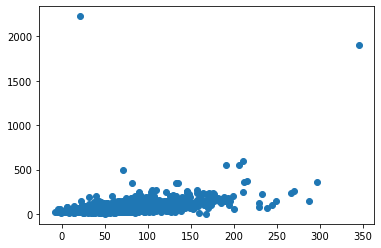

In [193]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)
plt.show()

In [194]:
# Create truncation function -> min 15
y_pred_2 = [15.0 if x < 15.0 else round(x) for x in y_pred]

In [197]:
# Calc R^2 score for truncated predictions
from sklearn.metrics import r2_score


r2_score(y_test, y_pred_2)

0.20528258819205647

# An improvement

This model scores 20% r-squared, which is an improvement over the original baseline model.

In [202]:
# Save the model object
import pickle

file_model = open('model.obj', 'wb')
pickle.dump(model, file_model)

In [203]:
file_model.close()